<a href="https://colab.research.google.com/github/Code-Abbey/Campus-02---Software-Development/blob/main/MCR_Data_Sciecne_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the file “flights.csv” in a dataframe with the name df

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/2024/flights.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# printing the first 5 rows of the dataframe
df.head()

,Month,DayOfWeek,AirTime,Distance,TaxiIn,TaxiOut,Delay,jfk_origin
0,1,2,79.0,541,17.0,14.0,late,0
1,1,3,72.0,541,4.0,29.0,late,0
2,1,3,73.0,541,8.0,14.0,late,0
3,1,3,91.0,541,5.0,44.0,late,1
4,1,3,99.0,541,12.0,29.0,late,1


In [6]:
# number of rows and columns
df.shape

(58193, 8)

In [7]:
# statistical measures
df.describe()

,Month,DayOfWeek,AirTime,Distance,TaxiIn,TaxiOut,jfk_origin
count,58193.000000,58193.000000,58193.000000,58193.000000,58193.000000,58193.000000,58193.000000
mean,5.375354,4.055316,160.570911,1174.504305,9.209029,31.549894,0.490368
std,2.651111,2.007885,100.053643,851.718229,8.071128,24.845344,0.499912
min,1.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,70.000000,340.000000,5.000000,16.000000,0.000000
50%,6.000000,4.000000,137.000000,1005.000000,7.000000,24.000000,0.000000
75%,8.000000,6.000000,260.000000,2153.000000,11.000000,38.000000,1.000000
max,10.000000,7.000000,595.000000,2586.000000,200.000000,422.000000,1.000000


In [8]:
# number of missing values in each column
df.isnull().sum()

Month         0
DayOfWeek     0
AirTime       0
Distance      0
TaxiIn        0
TaxiOut       0
Delay         0
jfk_origin    0
dtype: int64

In [9]:
# Convert "DayOfWeek" to a categorical data type
df['DayOfWeek'] = df['DayOfWeek'].astype('category')

<ipython-input-10-62ccfa16c78b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='coolwarm')


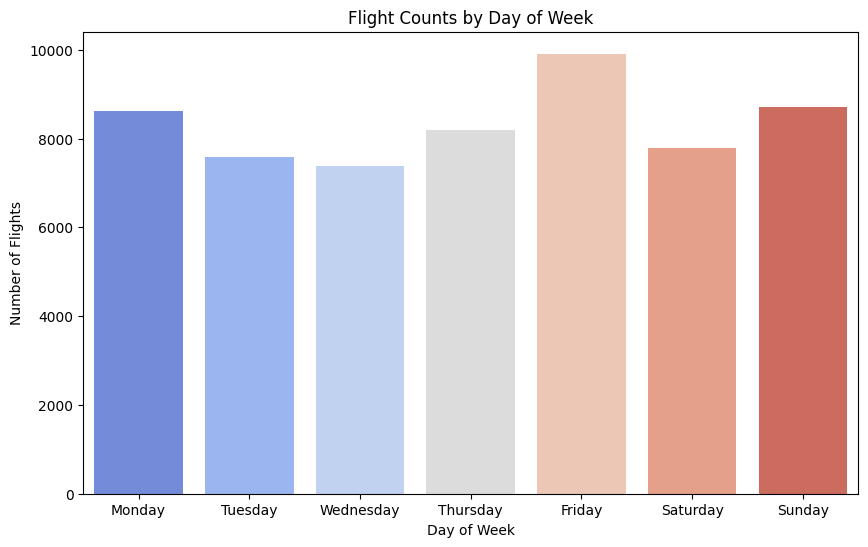

In [10]:
# Plotting - Bar chart for "DayOfWeek"
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, palette='coolwarm')
plt.title('Flight Counts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

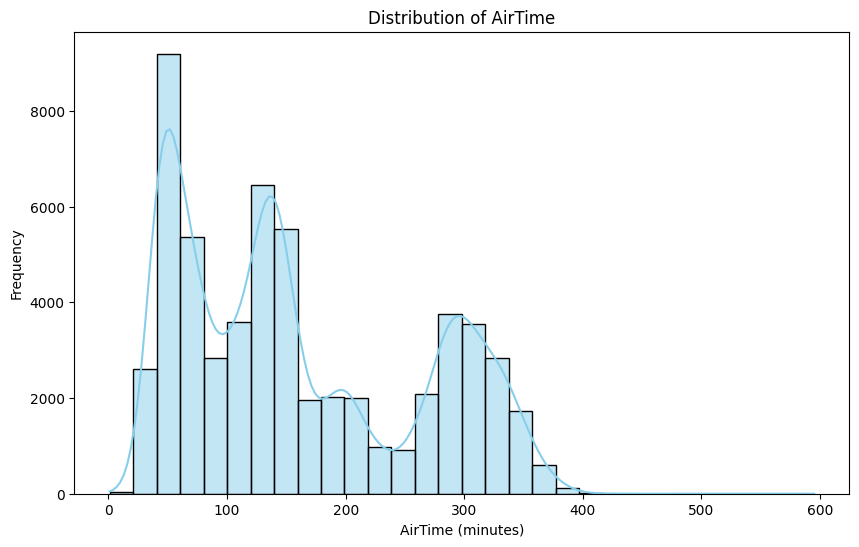

In [11]:
# Plotting - Histogram for "AirTime"
plt.figure(figsize=(10, 6))
sns.histplot(df['AirTime'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of AirTime')
plt.xlabel('AirTime (minutes)')
plt.ylabel('Frequency')
plt.show()

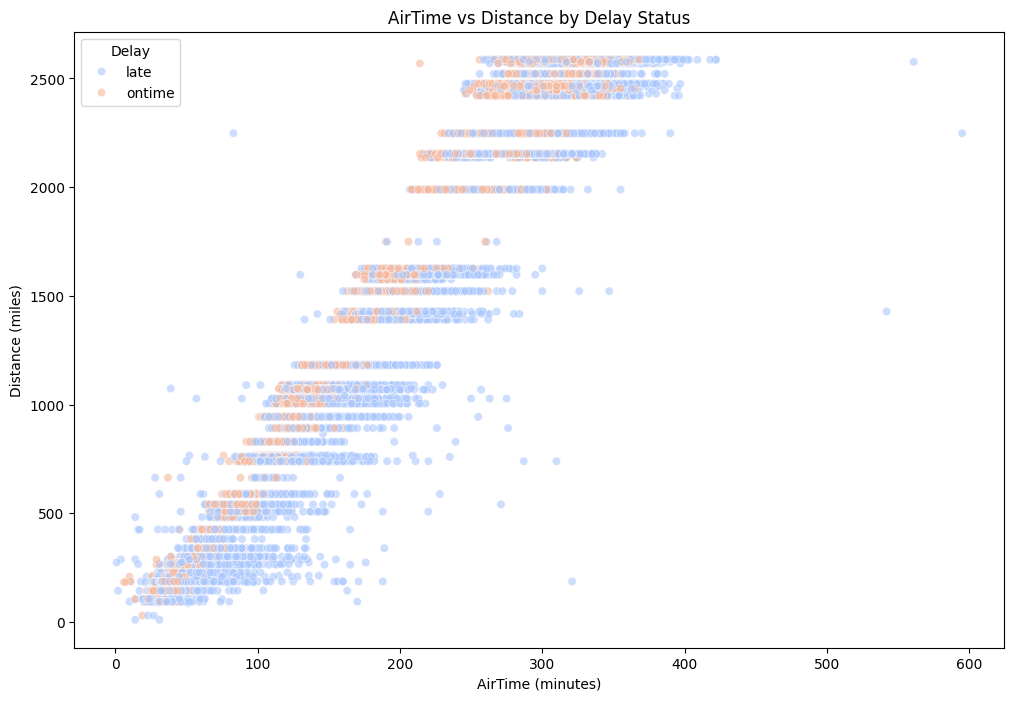

In [12]:
# Scatterplot - "AirTime" vs "Distance" with "Delay" as the hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='AirTime', y='Distance', hue='Delay', palette='coolwarm', alpha=0.6)
plt.title('AirTime vs Distance by Delay Status')
plt.xlabel('AirTime (minutes)')
plt.ylabel('Distance (miles)')
plt.show()

In [13]:
# Generate and display the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

               Month   AirTime  Distance    TaxiIn   TaxiOut  jfk_origin
Month       1.000000 -0.029325 -0.022468  0.057198  0.080027    0.000919
AirTime    -0.029325  1.000000  0.983762  0.042685  0.008711    0.053945
Distance   -0.022468  0.983762  1.000000  0.045664 -0.022374   -0.004078
TaxiIn      0.057198  0.042685  0.045664  1.000000 -0.065229   -0.298654
TaxiOut     0.080027  0.008711 -0.022374 -0.065229  1.000000    0.389884
jfk_origin  0.000919  0.053945 -0.004078 -0.298654  0.389884    1.000000


<ipython-input-13-1a33cdc8bceb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [14]:
# Dummy encode the categorical variable "DayOfWeek"
df_encoded = pd.get_dummies(df, columns=['DayOfWeek'], drop_first=True)

In [15]:
# Define the feature matrix X and the target vector y
X = df_encoded.drop('Delay', axis=1)
y = df_encoded['Delay']

In [16]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
# Predictions on training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [19]:
# Calculate confusion matrices and accuracies
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

In [20]:
# Print results
print("Training Confusion Matrix:\n", conf_matrix_train)
print("Test Confusion Matrix:\n", conf_matrix_test)
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Training Confusion Matrix:
 [[27287  3237]
 [ 8956  4164]]
Test Confusion Matrix:
 [[9070 1026]
 [3062 1391]]
Training Accuracy: 0.7206259737879205
Test Accuracy: 0.719018489243247
